In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Pritam Laskar/Documents/PGCM - DA/Term II/Term II Study Materials/204 ML Plus/Logistic Regression Case/ML+01+Logistic+Regession+Dataset+1.csv")

In [3]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


# EDA

In [4]:
df.shape

(4000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['Id'], axis = 1, inplace = True)

In [8]:
(df.isnull().sum()/len(df))*100

Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [9]:
df.drop(['Outcome'], axis = 1, inplace = True)

# As Outcome has null values > 30%, we will drop them

In [10]:
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [11]:
df['Job'].unique()

array(['management', 'blue-collar', 'student', 'technician', 'admin.',
       'services', 'self-employed', 'retired', nan, 'housemaid',
       'entrepreneur', 'unemployed'], dtype=object)

In [12]:
df['Job'].value_counts(ascending = False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

In [13]:
df['Job'] = df['Job'].fillna(df['Job'].mode())

In [14]:
df['Job'].replace(to_replace = ['student', 'retired'], value = 'unemployed', inplace = True)
df['Job'].replace(to_replace = ['entrepreneur'], value = 'self-employed', inplace = True)
df['Job'].replace(to_replace = ['housemaid','technician'], value ='services', inplace = True)

In [15]:
df['Education'].unique()

array(['tertiary', 'primary', 'secondary', nan], dtype=object)

In [16]:
df['Education'].unique()

array(['tertiary', 'primary', 'secondary', nan], dtype=object)

In [17]:
df['Education'].value_counts(ascending = False)

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [18]:
df['Education'] = df['Education'].fillna(df['Education'].mode())

In [19]:
df['Communication'].unique()

array(['telephone', nan, 'cellular'], dtype=object)

In [20]:
df['Communication'].value_counts(ascending = False)

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [21]:
df['Communication'] = df['Communication'].fillna('telephone')

# We filled null values with 'telephone' because 'cellular' already had high number of values.

In [22]:
df['Balance'] = pd.cut(df['Balance'], bins = [-4000, 0, 5000, 100000], labels = ['null', 'mid', 'high'])
df['Balance'].value_counts(ascending = False)

mid     3147
null     574
high     279
Name: Balance, dtype: int64

In [23]:
df['NoOfContacts'] = pd.cut(df['NoOfContacts'], bins = [-1, 1, 3, 50], labels = ['normal', 'mid', 'high'])
df['NoOfContacts'].value_counts(ascending = False)

normal    1685
mid       1601
high       714
Name: NoOfContacts, dtype: int64

In [24]:
df['PrevAttempts'] = pd.cut(df['PrevAttempts'], bins = [-1, 0, 60], labels = [0,1])
df['PrevAttempts'].value_counts(ascending = False)

0    3042
1     958
Name: PrevAttempts, dtype: int64

In [25]:
df['CallStart'] = pd.to_datetime(df['CallStart'])
df['CallEnd'] = pd.to_datetime(df['CallEnd'])
df['duration'] = df['CallEnd'].dt.minute-df['CallStart'].dt.minute
df['duration']

0        1
1        3
2        6
3       14
4        3
        ..
3995     4
3996     2
3997     4
3998     2
3999     5
Name: duration, Length: 4000, dtype: int64

In [26]:
df.describe()

,Age,Default,HHInsurance,CarLoan,LastContactDay,DaysPassed,CarInsurance,duration
count,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,0.49275,0.133000,15.721250,48.706500,0.401000,-0.337750
std,11.550194,0.119555,0.50001,0.339617,8.425307,106.685385,0.490162,17.125974
min,18.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,0.000000,-59.000000
25%,32.000000,0.000000,0.00000,0.000000,8.000000,-1.000000,0.000000,2.000000
50%,39.000000,0.000000,0.00000,0.000000,16.000000,-1.000000,0.000000,3.000000
75%,49.000000,0.000000,1.00000,0.000000,22.000000,-1.000000,1.000000,6.000000
max,95.000000,1.000000,1.00000,1.000000,31.000000,854.000000,1.000000,39.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   category      
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     4000 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   category      
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   category      
 14  CallStart         4000 n

# EDA - Checking Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

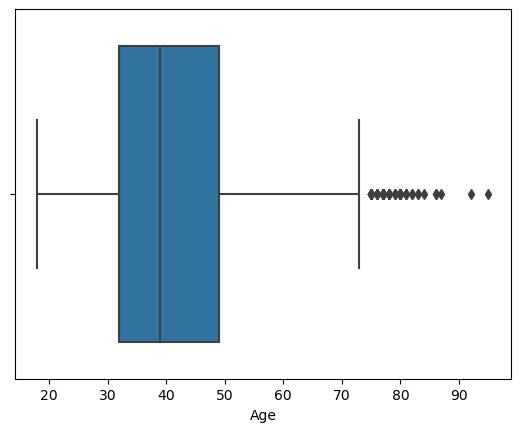

In [28]:
# Age:

sns.boxplot(df['Age'])

In [29]:
Q3 = df['Age'].quantile(.75)
Q1 = df['Age'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

74.5
23.5


In [30]:
import numpy as np

In [31]:
df['Age'] = np.where(df['Age'] > 74.5, 74.5, np.where(df['Age'] < 23.5, 23.5, df['Age']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

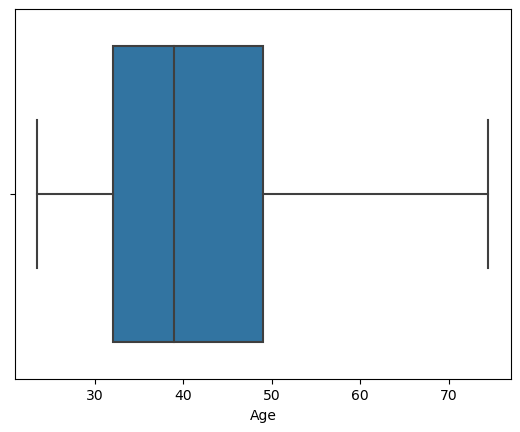

In [32]:
sns.boxplot(df['Age'])

<AxesSubplot:ylabel='LastContactDay'>

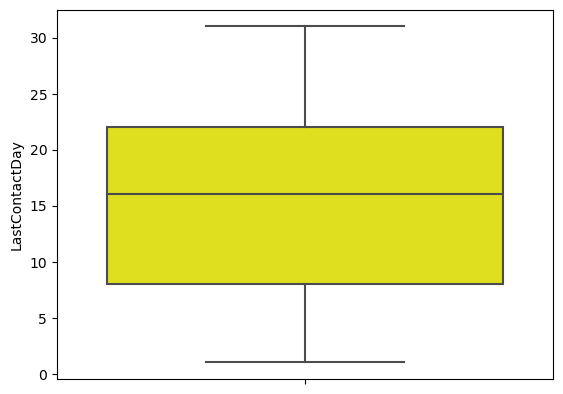

In [33]:
# LastContactDay

sns.boxplot(data = df, y = 'LastContactDay', color = 'yellow')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DaysPassed'>

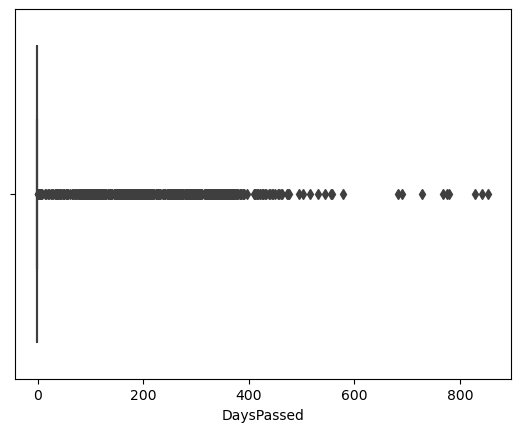

In [34]:
# DaysPassed

sns.boxplot(df['DaysPassed'])

In [35]:
Q3 = df['DaysPassed'].quantile(.75)
Q1 = df['DaysPassed'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

-1.0
-1.0


In [36]:
df['DaysPassed'] = np.where(df['DaysPassed'] > -1, -1, np.where(df['DaysPassed'] < -1, -1, df['DaysPassed']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

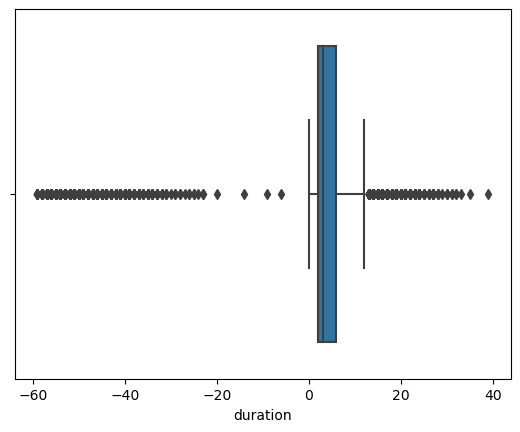

In [37]:
# Duration

sns.boxplot(df['duration'])

In [38]:
Q3 = df['duration'].quantile(.75)
Q1 = df['duration'].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q3 - 1.5*(IQR)
print(UL)
print(LL)

12.0
0.0


In [39]:
df['duration'] = np.where(df['duration'] > 12, 12, np.where(df['duration'] < 0, 0, df['duration']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

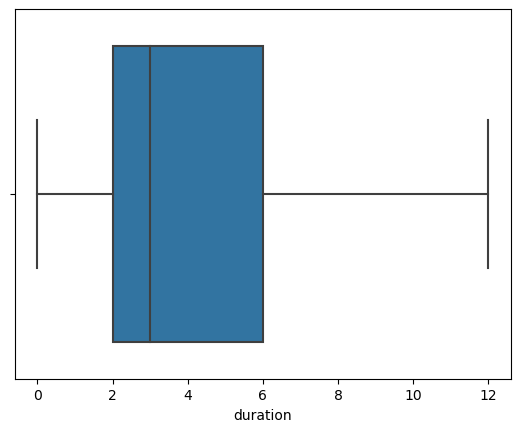

In [40]:
sns.boxplot(df['duration'])

# Checking Correlation

In [41]:
# As our target column is 'Car Insurance', we will check correlation of this column with other columnd

df.corr()['CarInsurance']

# The higher the correlation, the more important that column will be

Age               0.037807
Default          -0.039506
HHInsurance      -0.203419
CarLoan          -0.092131
LastContactDay   -0.061271
DaysPassed             NaN
CarInsurance      1.000000
duration          0.375080
Name: CarInsurance, dtype: float64

In [42]:
df.drop(['CallStart','CallEnd','Default','LastContactMonth'],axis=1,inplace=True)

# In default we have one value so we will drop

df['Balance'] = df['Balance'].astype('object')
df['NoOfContacts'] = df['NoOfContacts'].astype('object')
df['DaysPassed'] = df['DaysPassed'].astype('object')
df['PrevAttempts'] = df['PrevAttempts'].astype(int)


# Creating Dummies

In [43]:
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')

In [44]:
df_dummy = pd.get_dummies(df_cat, drop_first=True)
df_dummy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Job_blue-collar,Job_management,Job_self-employed,Job_services,Job_unemployed,Marital_married,Marital_single,Education_secondary,Education_tertiary,Balance_mid,Balance_null,Communication_telephone,NoOfContacts_mid,NoOfContacts_normal
0,0,1,0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,1,0,1,1,0,0,0,1
3,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,1,0,0,1,0,1,0,1,0,0,1
3996,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3997,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3998,0,0,1,0,0,0,1,0,1,1,0,0,0,1


In [45]:
data = pd.concat([df_dummy, df_num], axis = 1)
data.shape

(4000, 21)

# Train_Test_Split and Logistic Regression Model

In [46]:
x = data.drop(['CarInsurance'], axis = 1)
y = data['CarInsurance']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy

# This is accuracy of unscaled data. Next we will scale it using StandardScaler

0.7541666666666667

In [50]:
# Scaling using StandardScaler

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)
lr = LogisticRegression()
lr.fit(x_train2,y_train)
y_pred1 = lr.predict(x_test2)

In [51]:
y_pred1

# Our predicted values (scaled)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
# Accuracy and F1 score of scaled model

f1 = f1_score(y_test,y_pred1)
precision = precision_score(y_test, y_pred1)
accuracy = accuracy_score(y_test,y_pred1)
print('Accuracy = ',accuracy)
print('F1 Score = ', f1)
print('Precision Score = ', precision)

Accuracy =  0.7558333333333334
F1 Score =  0.6636050516647533
Precision Score =  0.7083333333333334


In [53]:
print("from sklearn.model_selection import KFold -> Cross-validation is used in real-life settings, especially when working with imbalanced datasets. Cross-validation techniques such as 'KFold' are also useful for hyperparameter tuning, which involves selecting the optimal set of hyperparameters for a given model. By using cross-validation to evaluate the performance of different hyperparameter values on different folds of the data, we can obtain a more reliable estimate of the optimal hyperparameters for the model.")

from sklearn.model_selection import KFold -> Cross-validation is used in real-life settings, especially when working with imbalanced datasets. Cross-validation techniques such as 'KFold' are also useful for hyperparameter tuning, which involves selecting the optimal set of hyperparameters for a given model. By using cross-validation to evaluate the performance of different hyperparameter values on different folds of the data, we can obtain a more reliable estimate of the optimal hyperparameters for the model.
